In [1]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop


In [3]:
# downloading the training, testing images and labels using the tf load_data() method
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# now, we need to normalize the images to be able to pass them through the CNN (all values should be 0 < x < 1)
# normalizing training images
x_train = x_train / 255
# normalizing testing images
x_test = x_test / 255


model = tf.keras.models.Sequential([
    # input shape is 32x32x3 since the size of each image is 32x32 pixels, with 3 colours
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # dropout layer(s) to reduce overfitting
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
    # the last layer has 10 neurons since we have a total of 10 classes we need to classify
    tf.keras.layers.Dense(units=10, activation=tf.nn.softmax)
])

# compiling the model with the 'adam' optimizer function, 
# 'sparse_categorical_crossentropy' loss function since 
# we need to classify multiple classes
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    x_train,
    y_train,
    epochs = 15,
    verbose=1,
    validation_data=(x_test, y_test),
)

170508288/170498071 [==============================] - 2s 0us/step
Epoch 1/15
1563/1563 [==============================] - 25s 9ms/step - loss: 1.4586 - accuracy: 0.4745 - val_loss: 1.1652 - val_accuracy: 0.5876
Epoch 2/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1588 - accuracy: 0.5875 - val_loss: 1.0170 - val_accuracy: 0.6405
Epoch 3/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0281 - accuracy: 0.6380 - val_loss: 0.9545 - val_accuracy: 0.6656
Epoch 4/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.9246 - accuracy: 0.6754 - val_loss: 0.8526 - val_accuracy: 0.7041
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8482 - accuracy: 0.7046 - val_loss: 0.8204 - val_accuracy: 0.7213
Epoch 6/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7833 - accuracy: 0.7252 - val_loss: 0.8144 - val_accuracy: 0.7242
Epoch 7/15
1563/1563 [==============================] - 13s 8ms

Text(0.5, 1.0, 'Training and validation loss')

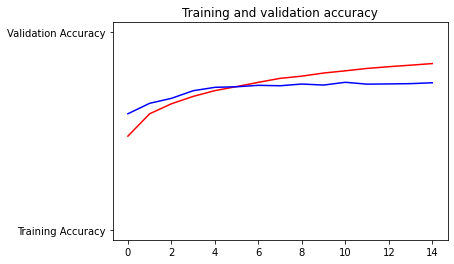

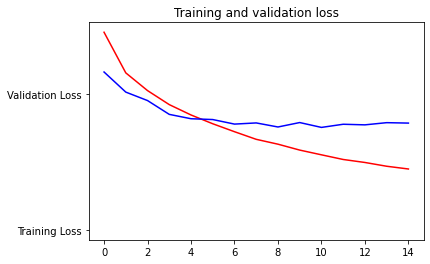

In [4]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

# Retrieve a list of list results on training and test data
# sets for each training epoch

accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(accuracy)) # Get number of epochs

# training and validation accuracy per epoch
plt.plot(epochs, accuracy, 'r', "Training Accuracy")
plt.plot(epochs, val_accuracy, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()


# training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.title('Training and validation loss')

In [ ]:
# code block to manually input image into the model and see result
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(32, 32, 3))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0][0]>0:
    print(fn + " is an airplane")
  elif classes[0][1]>0:
    print(fn + " is an automobile")
  elif classes[0][2]>0:
    print(fn + " is a bird")
  elif classes[0][3]>0:
    print(fn + " is a cat")
  elif classes[0][4]>0:
    print(fn + " is a deer")
  elif classes[0][5]>0:
    print(fn + " is a dog")
  elif classes[0][6]>0:
    print(fn + " is a frog")
  elif classes[0][7]>0:
    print(fn + " is a horse")
  elif classes[0][8]>0:
    print(fn + " is a ship")
  elif classes[0][9]>0:
    print(fn + " is a truck")